# SVR Multivariable
https://medium.com/swlh/support-vector-regression-explained-for-beginners-2a8d14ba6e5d

In [4]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open('vec_dict1.pickle', 'rb') as h:
    vec = pickle.load(h)
with open('sca_dict1.pickle', 'rb') as h:
    sca = pickle.load(h)

In [1476]:
vec[4]

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
77,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,sdrBundleStored:vector,NaN,NaN,NaN,0 840 840 840.0000001 840.0000001 840.0000002 ...,0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 ...
81,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,sdrBytesStored:vector,NaN,NaN,NaN,0 840 840 840.0000001 840.0000001 840.0000002 ...,0 100 0 100 0 100 0 100 0 100 0 100 0 100 0 10...
181,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,routeCgrDijkstraCalls:vector,NaN,NaN,NaN,840 840.0000001 840.0000002 840.0000003 840.00...,0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 ...
185,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,routeCgrDijkstraLoops:vector,NaN,NaN,NaN,840 840.0000001 840.0000002 840.0000003 840.00...,0 0 0 0 0 0 0 0 0 0 10 0 0 0 0 0 0 0 0 0 0 0 0...
189,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,routeCgrRouteTableEntriesCreated:vector,NaN,NaN,NaN,840 840.0000001 840.0000002 840.0000003 840.00...,0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 ...
193,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,routeCgrRouteTableEntriesExplored:vector,NaN,NaN,NaN,840 840.0000001 840.0000002 840.0000003 840.00...,0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
197,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,dtnCgrCalls:vector,NaN,NaN,NaN,840 840.0000001 840.0000002 840.0000003 840.00...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
201,General-0-20210123-20:05:41-23523,vector,dtnsim.node[4].dtn,sdrBundlesDeleted:vector,NaN,NaN,NaN,840 840.0000001 840.0000002 840.0000003 840.00...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 ...


In [1477]:
sca[5]

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues
601,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,routeCgrRouteTableEntriesCreated:max,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,routeCgrRouteTableEntriesCreated:sum,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,sdrBytesStored:timeavg,NaN,NaN,9.375000e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,sdrBytesStored:max,NaN,NaN,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,sdrBundleStored:timeavg,NaN,NaN,9.375000e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,sdrBundleStored:max,NaN,NaN,1.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,dtnBundleReRouted:count,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,General-0-20210123-20:05:41-23523,scalar,dtnsim.node[5].dtn,dtnBundleReceivedFromCom:count,NaN,NaN,7.200000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
957,General-0-20210123-20:05:41-23523,histogram,dtnsim.node[5].dtn,dtnBundleSentToAppRevisitedHops:histogram,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0 1,0
961,General-0-20210123-20:05:41-23523,histogram,dtnsim.node[5].dtn,dtnBundleSentToAppHopCount:histogram,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0 1,0


# Doing regression inside ONE node

In [305]:
node = 1

In [306]:
target = vec[node].loc[vec[node]['name'] == 'sdrBundleStored:vector']
feat1 = vec[node].loc[vec[node]['name'] == 'sdrBytesStored:vector']
feat2 = vec[node].loc[vec[node]['name'] == 'dtnCgrCalls:vector']
feat3 = vec[node].loc[vec[node]['name'] == 'sdrBundlesDeleted:vector']

In [307]:
target = tuple(map(float, target['vecvalue'].to_list()[0].split())) #value as float
feat1 = tuple(map(float, feat1['vecvalue'].to_list()[0].split()))
feat2 = tuple(map(float, feat2['vecvalue'].to_list()[0].split()))
feat3 = tuple(map(float, feat3['vecvalue'].to_list()[0].split()))
plot = [target, feat1, feat2, feat3]

In [308]:
source = list(zip(*plot))
dataset = pd.DataFrame(source)#, columns = ['bundleStored','bytesStored', 'cgrCalls', 'bundlesDeleted'])

In [309]:
dataset

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,1.0,100.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,100.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
257,1.0,100.0,1.0,48.0
258,0.0,0.0,1.0,49.0
259,1.0,100.0,1.0,50.0
260,0.0,0.0,1.0,51.0


<AxesSubplot:>

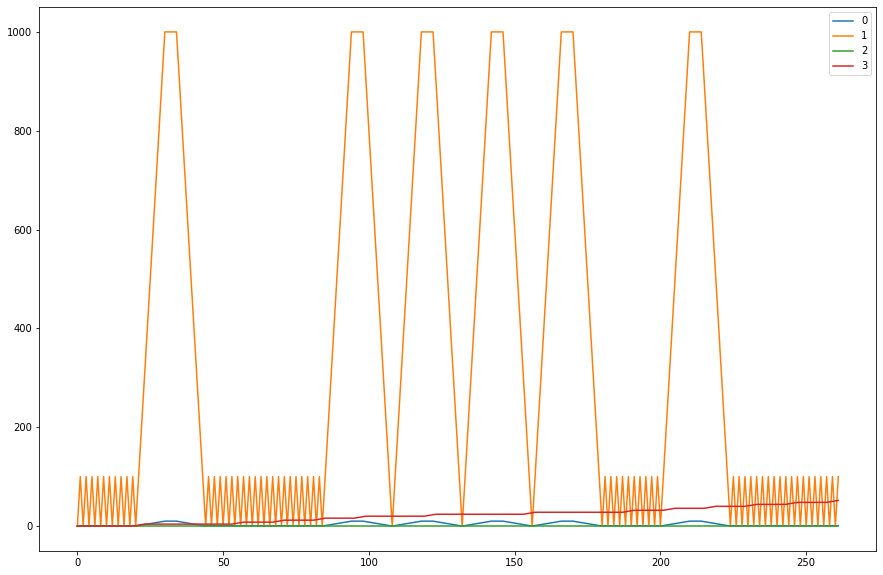

In [310]:
dataset.plot(figsize=(15,10))

In [311]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, :1]

In [312]:
print(X.shape)
print(y.shape)

(262, 3)
(262, 1)


In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [314]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [315]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/home/lgaray/miniconda3/envs/omn/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [316]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))

In [317]:
src = [y_test.values.reshape(len(y_pred),), y_pred]
src = list(zip(*src))

In [318]:
df = pd.DataFrame(src, columns = ['Real Values','Predicted Values'])
df

,Real Values,Predicted Values
0,0.0,0.358036
1,3.0,2.623882
2,10.0,9.655378
3,0.0,0.367107
4,3.0,2.633615
5,2.0,1.606899
6,1.0,0.849099
7,1.0,0.849308
8,10.0,9.723609
9,4.0,3.759668


<AxesSubplot:>

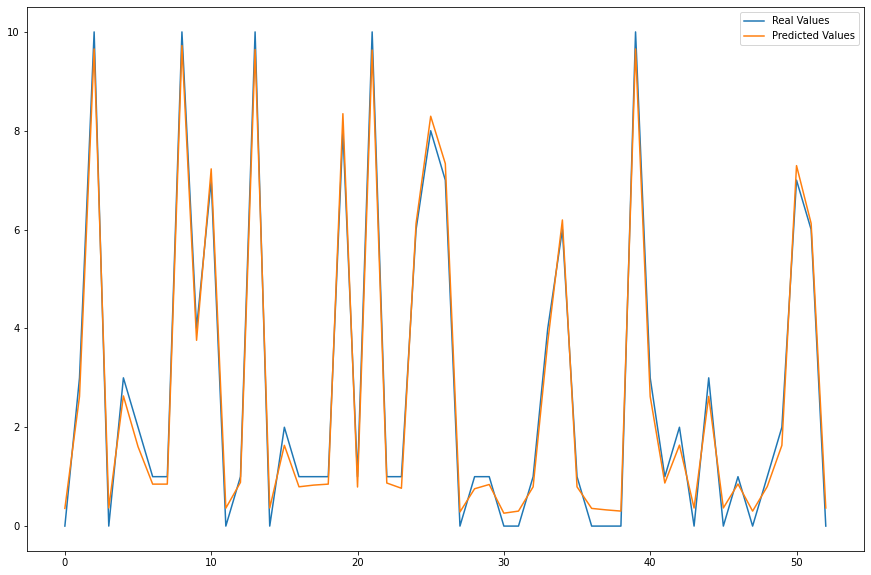

In [319]:
df.plot(figsize=(15,10))

In [320]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9921083252283872

In [403]:
sca[3]

,run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,binedges,binvalues
401,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,routeCgrRouteTableEntriesCreated:max,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,routeCgrRouteTableEntriesCreated:sum,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,sdrBytesStored:timeavg,NaN,NaN,4.166667e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,sdrBytesStored:max,NaN,NaN,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,sdrBundleStored:timeavg,NaN,NaN,4.166667e-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,sdrBundleStored:max,NaN,NaN,1.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,dtnBundleReRouted:count,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,General-0-20210123-12:13:01-16853,scalar,dtnsim.node[3].dtn,dtnBundleReceivedFromCom:count,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,General-0-20210123-12:13:01-16853,histogram,dtnsim.node[3].dtn,dtnBundleSentToAppRevisitedHops:histogram,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0 1,0
929,General-0-20210123-12:13:01-16853,histogram,dtnsim.node[3].dtn,dtnBundleSentToAppHopCount:histogram,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0 1,0


In [356]:
vec[3]

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
69,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,sdrBundleStored:vector,NaN,NaN,NaN,0 14580 14580 14580 14580 14580 14580 14580 14...,0 1 2 3 4 5 6 7 8 9 10 10 10 10 10 9 8 7 6 5 4...
73,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,sdrBytesStored:vector,NaN,NaN,NaN,0 14580 14580 14580 14580 14580 14580 14580 14...,0 100 200 300 400 500 600 700 800 900 1000 100...
209,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,routeCgrDijkstraCalls:vector,NaN,NaN,NaN,14580 14580 14580 14580 14580 14580 14580 1458...,2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
213,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,routeCgrDijkstraLoops:vector,NaN,NaN,NaN,14580 14580 14580 14580 14580 14580 14580 1458...,7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
217,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,routeCgrRouteTableEntriesCreated:vector,NaN,NaN,NaN,14580 14580 14580 14580 14580 14580 14580 1458...,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
221,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,routeCgrRouteTableEntriesExplored:vector,NaN,NaN,NaN,14580 14580 14580 14580 14580 14580 14580 1458...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
225,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,dtnCgrCalls:vector,NaN,NaN,NaN,14580 14580 14580 14580 14580 14580 14580 1458...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
229,General-0-20210123-12:13:01-16853,vector,dtnsim.node[3].dtn,sdrBundlesDeleted:vector,NaN,NaN,NaN,14580 14580 14580 14580 14580 14580 14580 1458...,0 0 0 0 0 0 0 0 0 0 1 2 3 4 4 4 4 4 4 4 4 4 4 ...


# Use previous nodes bytesStored to predict hub node bytesStored

In [6]:
check_nodes = 5
tar = 6
dfinfo = []
for i in range(check_nodes):
    bunStored = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundlesDeleted:vector'] #i+1
    aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    cgrCalls = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundleStored:vector']
    aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)

In [1604]:
dfinfo = []
tar = 6
node = 5
bunStored = vec[node].loc[vec[node]['name'] == 'sdrBundlesDeleted:vector']
aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
#cgrCalls = vec[node].loc[vec[node]['name'] == 'sdrBundleStored:vector']
#aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
#dfinfo.append(aux)

In [7]:
# Agregamos el nodo target
byStored = vec[tar].loc[vec[tar]['name'] == 'sdrBundleStored:vector']
aux = tuple(map(float, byStored['vecvalue'].to_list()[0].split()))
dfinfo.insert(0, aux)

In [8]:
src = list(zip(*dfinfo))
dataset = pd.DataFrame(src)#, columns = ['node5', 'node1','node2', 'node3', 'node4'])
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
318,1.0,149.0,1.0,99.0,1.0,72.0,0.0,81.0,7.0,36.0,1.0
319,0.0,150.0,0.0,99.0,0.0,72.0,1.0,81.0,6.0,36.0,0.0
320,1.0,151.0,1.0,99.0,1.0,72.0,0.0,81.0,5.0,36.0,1.0
321,0.0,152.0,2.0,99.0,0.0,72.0,1.0,81.0,4.0,36.0,0.0


<AxesSubplot:>

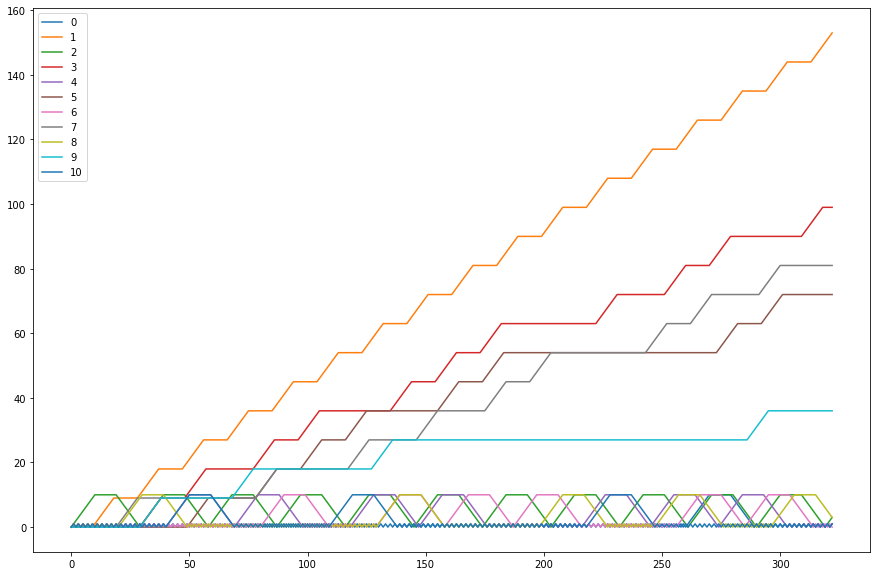

In [9]:
dataset.plot(figsize=(15,10))

In [10]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, :1]

In [11]:
print(X.shape)
print(y.shape)

(323, 10)
(323, 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/home/lgaray/miniconda3/envs/omn/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [15]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))

In [16]:
src = [y_test.values.reshape(len(y_pred),), y_pred]
src = list(zip(*src))

In [17]:
df = pd.DataFrame(src, columns = ['Real Values','Predicted Values'])
df

,Real Values,Predicted Values
0,1.0,0.855253
1,1.0,1.066289
2,1.0,0.728482
3,10.0,4.359578
4,0.0,0.927745
...,...,...
60,1.0,0.723861
61,1.0,0.664710
62,0.0,0.505448
63,0.0,0.225822


<AxesSubplot:>

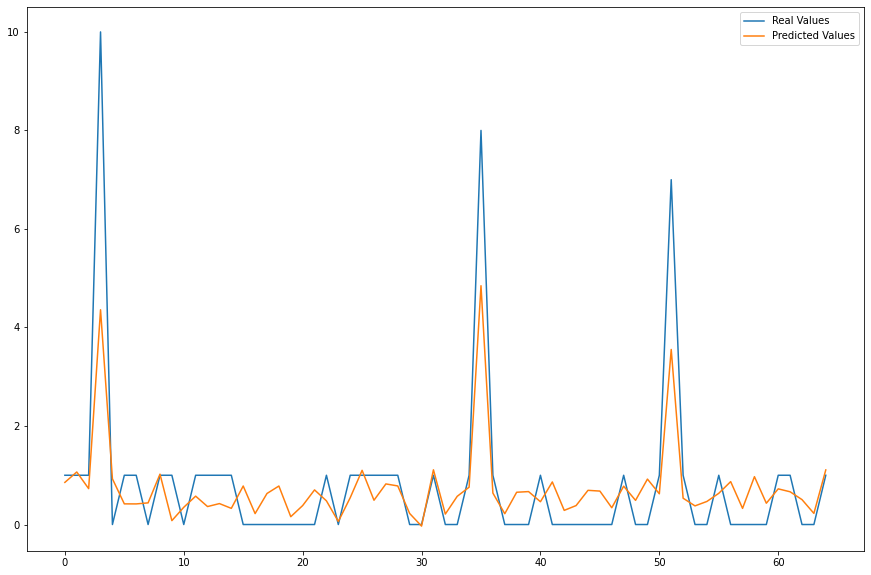

In [18]:
df.plot(figsize=(15,10))

In [1659]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6494718819538552